In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import *
from sklearn.metrics import *
from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids, NearMiss, TomekLinks, EditedNearestNeighbours

In [4]:
# df2019 = pd.read_csv('/content/drive/MyDrive/Cleaned_BRFSS2019.csv')
# df2021 = pd.read_csv('/content/drive/MyDrive/Cleaned_BRFSS2021.csv')

In [5]:
df2019 = pd.read_csv('Cleaned_BRFSS2019.csv')
df2021 = pd.read_csv('Cleaned_BRFSS2021.csv')

In [6]:
# combined_df = pd.concat([df2019, df2021])
# combined_df.sample(5)

In [7]:
df2019 = df2019[df2019.Diabetes != 1]
df2021 = df2021[df2021.Diabetes != 1]
df2019['Diabetes'] = df2019['Diabetes'].replace(2, 1)
df2021['Diabetes'] = df2021['Diabetes'].replace(2, 1)


In [8]:
df2019.shape

(171739, 22)

In [9]:
df2021.shape

(71124, 22)

In [10]:
df2019.Diabetes.value_counts()

Diabetes
0.0    147245
1.0     24494
Name: count, dtype: int64

# Results Without undersampling (skip run)

In [11]:
X_train = df2019.drop(columns=['Diabetes'])  # Features
y_train = df2019['Diabetes']  # Target variable
X_test = df2021.drop(columns=['Diabetes'])
y_test = df2021['Diabetes']
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
y_pred = rf_classifier.predict(X_test)
print("No undersampling")
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("")
cf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cf_matrix)
print("\nAUC Score:\n", roc_auc_score(y_test, y_pred))

No undersampling
Accuracy: 0.855801136044092

Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     60862
         1.0       0.50      0.19      0.28     10262

    accuracy                           0.86     71124
   macro avg       0.69      0.58      0.60     71124
weighted avg       0.82      0.86      0.83     71124


Confusion Matrix:
 [[58915  1947]
 [ 8309  1953]]

AUC Score:
 0.5791616872343727


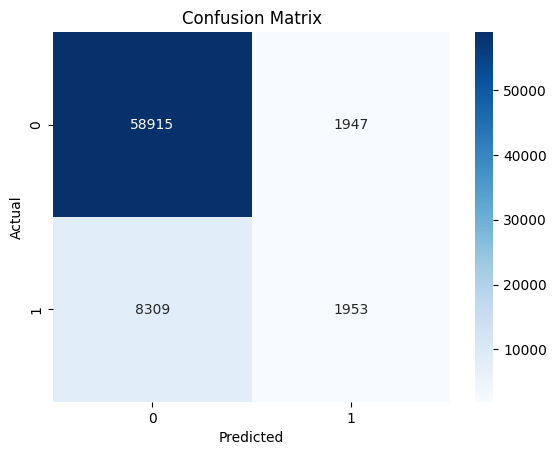

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Different Undersampling Code (skip run)

In [14]:
X = df2019.drop(columns=['Diabetes'])  # Features
y = df2019['Diabetes']  # Target variable

In [15]:
X.shape

(171739, 21)

In [16]:
# Resample dataset using RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X, y)

In [17]:
X_rus.shape

(48988, 21)

In [18]:
# Splitting the data into training and test sets
# X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size=0.2, random_state=42)
X_train_rus, y_train_rus = X_rus,y_rus
X_test_rus = df2021.drop(columns=['Diabetes'])
y_test_rus = df2021['Diabetes']

In [19]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_rus, y_train_rus)

RandomForestClassifier(random_state=42)

In [20]:
y_pred_rus = rf_classifier.predict(X_test_rus)

In [21]:
print("Random Under Sampling Results:\n")
print("Class count:\n", y_rus.value_counts())
print("")
accuracy = accuracy_score(y_test_rus, y_pred_rus)
print("Accuracy:", accuracy)
print("")
print("Classification Report:\n", classification_report(y_test_rus, y_pred_rus))
print("")
print("Confusion Matrix:\n", confusion_matrix(y_test_rus, y_pred_rus))
print("\nAUC Score:\n", roc_auc_score(y_test_rus, y_pred_rus))

Random Under Sampling Results:

Class count:
 Diabetes
0.0    24494
1.0    24494
Name: count, dtype: int64

Accuracy: 0.7179011304201114

Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.71      0.81     60862
         1.0       0.31      0.77      0.44     10262

    accuracy                           0.72     71124
   macro avg       0.63      0.74      0.63     71124
weighted avg       0.86      0.72      0.76     71124


Confusion Matrix:
 [[43175 17687]
 [ 2377  7885]]

AUC Score:
 0.7388802388623736


In [22]:
print("\nAUC Score:\n", roc_auc_score(y_test_rus, y_pred_rus))


AUC Score:
 0.7388802388623736


In [23]:
# Resample dataset using Cluster Centroids
cc = ClusterCentroids()
X_cc, y_cc = cc.fit_resample(X, y)

In [24]:
# Splitting the data into training and test sets
# X_train_cc, X_test_cc, y_train_cc, y_test_cc = train_test_split(X_cc, y_cc, test_size=0.2, random_state=42)
X_train_cc, y_train_cc = X_cc,y_cc
X_test_cc = df2021.drop(columns=['Diabetes'])
y_test_cc = df2021['Diabetes']

In [25]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=11)
rf_classifier.fit(X_train_cc, y_train_cc)

RandomForestClassifier(random_state=11)

In [26]:
y_pred_cc = rf_classifier.predict(X_test_cc)

In [27]:
print("Cluster Centroid Under Sampling Results:\n")
print("Class count:\n", y_cc.value_counts())
print("")
accuracy = accuracy_score(y_test_cc, y_pred_cc)
print("Accuracy:", accuracy)
print("")
print("Classification Report:\n", classification_report(y_test_cc, y_pred_cc))
print("")
print("Confusion Matrix:\n", confusion_matrix(y_test_cc, y_pred_cc))
print("\nAUC Score:\n", roc_auc_score(y_test_cc, y_pred_cc))

Cluster Centroid Under Sampling Results:

Class count:
 Diabetes
0.0    24494
1.0    24494
Name: count, dtype: int64

Accuracy: 0.3154068950002812

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.21      0.34     60862
         1.0       0.17      0.95      0.29     10262

    accuracy                           0.32     71124
   macro avg       0.57      0.58      0.31     71124
weighted avg       0.85      0.32      0.33     71124


Confusion Matrix:
 [[12634 48228]
 [  463  9799]]

AUC Score:
 0.5812332302308866


In [28]:
print("\nAUC Score:\n", roc_auc_score(y_test_cc, y_pred_cc))


AUC Score:
 0.5812332302308866


In [29]:
# Resample dataset using NearMiss
nm = NearMiss()
X_nm, y_nm = nm.fit_resample(X, y)

In [30]:
# Splitting the data into training and test sets
# X_train_nm, X_test_nm, y_train_nm, y_test_nm = train_test_split(X_nm, y_nm, test_size=0.2, random_state=42)
X_train_nm, y_train_nm = X_nm,y_nm
X_test_nm = df2021.drop(columns=['Diabetes'])
y_test_nm = df2021['Diabetes']

In [31]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_nm, y_train_nm)

RandomForestClassifier(random_state=42)

In [32]:
y_pred_nm = rf_classifier.predict(X_test_nm)

In [34]:
print("\nAUC Score:\n", roc_auc_score(y_test_nm, y_pred_nm))


AUC Score:
 0.5717280258444617


In [35]:
# Tomek Links Under Sampling
tl = TomekLinks()

In [36]:
X_tl, y_tl = tl.fit_resample(X, y)

In [37]:
# Splitting the data into training and test sets
# X_train_tl, X_test_tl, y_train_tl, y_test_tl = train_test_split(X_tl, y_tl, test_size=0.2, random_state=42)
X_train_tl, y_train_tl = X_tl,y_tl
X_test_tl = df2021.drop(columns=['Diabetes'])
y_test_tl = df2021['Diabetes']

In [33]:
print("Near Miss Under Sampling Results:\n")
print("Class count:\n", y_nm.value_counts())
print("")
accuracy = accuracy_score(y_test_nm, y_pred_nm)
print("Accuracy:", accuracy)
print("")
print("Classification Report:\n", classification_report(y_test_nm, y_pred_nm))
print("")
print("Confusion Matrix:\n", confusion_matrix(y_test_nm, y_pred_nm))
print("\nAUC Score:\n", roc_auc_score(y_test_nm, y_pred_nm))

Near Miss Under Sampling Results:

Class count:
 Diabetes
0.0    24494
1.0    24494
Name: count, dtype: int64

Accuracy: 0.40333783251785615

Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.34      0.49     60862
         1.0       0.17      0.81      0.28     10262

    accuracy                           0.40     71124
   macro avg       0.54      0.57      0.39     71124
weighted avg       0.81      0.40      0.46     71124


Confusion Matrix:
 [[20391 40471]
 [ 1966  8296]]

AUC Score:
 0.5717280258444617


In [38]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_tl, y_train_tl)

RandomForestClassifier(random_state=42)

In [39]:
y_pred_tl = rf_classifier.predict(X_test_tl)

In [40]:
print("Tomek Links Under Sampling Results:\n")
print("Class count:\n", y_tl.value_counts())
print("")
accuracy = accuracy_score(y_test_tl, y_pred_tl)
print("Accuracy:", accuracy)
print("")
print("Classification Report:\n", classification_report(y_test_tl, y_pred_tl))
print("")
print("Confusion Matrix:\n", confusion_matrix(y_test_tl, y_pred_tl))
print("\nAUC Score:\n", roc_auc_score(y_test_tl, y_pred_tl))

Tomek Links Under Sampling Results:

Class count:
 Diabetes
0.0    141432
1.0     24494
Name: count, dtype: int64

Accuracy: 0.8544092008323492

Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.96      0.92     60862
         1.0       0.49      0.24      0.32     10262

    accuracy                           0.85     71124
   macro avg       0.69      0.60      0.62     71124
weighted avg       0.83      0.85      0.83     71124


Confusion Matrix:
 [[58280  2582]
 [ 7773  2489]]

AUC Score:
 0.6000607343490914


In [41]:
# Edited Nearest Neighbors Under Sampling
enn = EditedNearestNeighbours()

In [42]:
X_enn, y_enn = enn.fit_resample(X, y)

In [43]:
# Splitting the data into training and test sets
# X_train_enn, X_test_enn, y_train_enn, y_test_enn = train_test_split(X_enn, y_enn, test_size=0.2, random_state=42)
X_train_enn, y_train_enn = X_enn,y_enn
X_test_enn = df2021.drop(columns=['Diabetes'])
y_test_enn = df2021['Diabetes']

In [44]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_enn, y_train_enn)

RandomForestClassifier(random_state=42)

In [45]:
y_pred_enn = rf_classifier.predict(X_test_enn)

In [46]:
print("Edited Nearest Neighbors Under Sampling Results:\n")
print("Class count:\n", y_enn.value_counts())
print("")
accuracy = accuracy_score(y_test_enn, y_pred_enn)
print("Accuracy:", accuracy)
print("")
print("Classification Report:\n", classification_report(y_test_enn, y_pred_enn))
print("")
print("Confusion Matrix:\n", confusion_matrix(y_test_enn, y_pred_enn))
print("\nAUC Score:\n", roc_auc_score(y_test_enn, y_pred_enn))

Edited Nearest Neighbors Under Sampling Results:

Class count:
 Diabetes
0.0    109081
1.0     24494
Name: count, dtype: int64

Accuracy: 0.816798830212024

Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.87      0.89     60862
         1.0       0.40      0.52      0.45     10262

    accuracy                           0.82     71124
   macro avg       0.66      0.69      0.67     71124
weighted avg       0.84      0.82      0.83     71124


Confusion Matrix:
 [[52732  8130]
 [ 4900  5362]]

AUC Score:
 0.6944646720066235


Using Tomek Links and ENN, along with Cluster Centroids

In [47]:
# Tomek Links Under Sampling
tl = TomekLinks()
X_tl, y_tl = tl.fit_resample(X, y)
# Resample dataset using Cluster Centroids
cc = ClusterCentroids()
X_tlcc, y_tlcc = cc.fit_resample(X_tl, y_tl)

In [48]:
# Splitting the data into training and test sets
# X_train_tlcc, X_test_tlcc, y_train_tlcc, y_test_tlcc = train_test_split(X_tlcc, y_tlcc, test_size=0.2, random_state=42)

X_train_tlcc, y_train_tlcc = X_tlcc,y_tlcc
X_test_tlcc = df2021.drop(columns=['Diabetes'])
y_test_tlcc = df2021['Diabetes']

In [49]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_tlcc, y_train_tlcc)

RandomForestClassifier(random_state=42)

In [50]:
y_pred_tlcc = rf_classifier.predict(X_test_tlcc)

In [51]:
print("Tomek Links + Cluster Centroids Under Sampling Results:\n")
print("Class count:\n", y_tlcc.value_counts())
print("")
accuracy = accuracy_score(y_test_tlcc, y_pred_tlcc)
print("Accuracy:", accuracy)
print("")
print("Classification Report:\n", classification_report(y_test_tlcc, y_pred_tlcc))
print("")
print("Confusion Matrix:\n", confusion_matrix(y_test_tlcc, y_pred_tlcc))
print("\nAUC Score:\n", roc_auc_score(y_test_tlcc, y_pred_tlcc))

Tomek Links + Cluster Centroids Under Sampling Results:

Class count:
 Diabetes
0.0    24494
1.0    24494
Name: count, dtype: int64

Accuracy: 0.3290591080366684

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.22      0.36     60862
         1.0       0.17      0.95      0.29     10262

    accuracy                           0.33     71124
   macro avg       0.57      0.59      0.33     71124
weighted avg       0.85      0.33      0.35     71124


Confusion Matrix:
 [[13642 47220]
 [  500  9762]]

AUC Score:
 0.5877114919528005


Using ENN and Cluster Centroids Under Sampling

In [52]:
# Edited Nearest Neighbors Under Sampling
enn = EditedNearestNeighbours()
X_enn, y_enn = enn.fit_resample(X, y)
# Resample dataset using Cluster Centroids
cc = ClusterCentroids()
X_enncc, y_enncc = cc.fit_resample(X_enn, y_enn)

In [53]:
# Splitting the data into training and test sets
# X_train_enncc, X_test_enncc, y_train_enncc, y_test_enncc = train_test_split(X_enncc, y_enncc, test_size=0.2, random_state=42)
X_train_enncc, y_train_enncc = X_enncc,y_enncc
X_test_enncc = df2021.drop(columns=['Diabetes'])
y_test_enncc = df2021['Diabetes']

In [54]:

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_enncc, y_train_enncc)

RandomForestClassifier(random_state=42)

In [55]:
y_pred_enncc = rf_classifier.predict(X_test_enncc)

In [56]:

print("Edited Nearest Neighbors + Cluster Centroids Under Sampling Results:\n")
print("Class count:\n", y_enncc.value_counts())
print("")
accuracy = accuracy_score(y_test_enncc, y_pred_enncc)
print("Accuracy:", accuracy)
print("")
print("Classification Report:\n", classification_report(y_test_enncc, y_pred_enncc))
print("")
print("Confusion Matrix:\n", confusion_matrix(y_test_enncc, y_pred_enncc))
print("\nAUC Score:\n", roc_auc_score(y_test_enncc, y_pred_enncc))

Edited Nearest Neighbors + Cluster Centroids Under Sampling Results:

Class count:
 Diabetes
0.0    24494
1.0    24494
Name: count, dtype: int64

Accuracy: 0.41624486811765365

Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.33      0.49     60862
         1.0       0.19      0.93      0.32     10262

    accuracy                           0.42     71124
   macro avg       0.58      0.63      0.40     71124
weighted avg       0.85      0.42      0.47     71124


Confusion Matrix:
 [[20038 40824]
 [  695  9567]]

AUC Score:
 0.6307555220711045


#One custom stratified sampling 1 : 2

In [57]:
df2019.Diabetes.value_counts()

Diabetes
0.0    147245
1.0     24494
Name: count, dtype: int64

In [82]:
X_test = df2021.drop(columns=['Diabetes'])
y_test = df2021['Diabetes']

df_minority = df2019[df2019['Diabetes'] == 1]
df_majority = df2019[df2019['Diabetes'] == 0]

#Stratified sampling using Test train split function

_,df_majority_us = train_test_split(df_majority,test_size = 2*len(df_minority)/len(df2019), random_state = 319)

In [83]:
len(df_majority_us),len(df_minority)

(42002, 24494)

In [84]:
X = pd.concat([df_majority_us, df_minority])
X_train = X.drop(columns=['Diabetes'])  # Features
y_train = X['Diabetes']  # Target variable

In [85]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [86]:
y_pred = rf_classifier.predict(X_test)

In [87]:
print("Custom Stratified Sampling:\n")
print("Class count:\n", y_train.value_counts())
print("")
rf_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", rf_accuracy)
print("")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("")
cf_matrix =  confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nAUC Score:\n", roc_auc_score(y_test, y_pred))

print("\nRandom Forest:")

rf_recall = recall_score(y_test, y_pred)
rf_auc = roc_auc_score(y_test, y_pred)
print(f"Accuracy: {rf_accuracy}")
print(f"Recall: {rf_recall}")
print(f"AUC: {rf_auc}")

Custom Stratified Sampling:

Class count:
 Diabetes
0.0    42002
1.0    24494
Name: count, dtype: int64

Accuracy: 0.7870901524098757

Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.82      0.87     60862
         1.0       0.36      0.62      0.46     10262

    accuracy                           0.79     71124
   macro avg       0.64      0.72      0.66     71124
weighted avg       0.85      0.79      0.81     71124


Confusion Matrix:
 [[49644 11218]
 [ 3925  6337]]

AUC Score:
 0.7166011643121489

Random Forest:
Accuracy: 0.7870901524098757
Recall: 0.6175209510816605
AUC: 0.7166011643121489


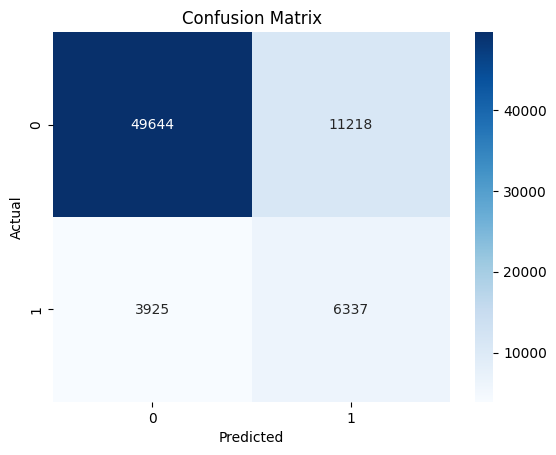

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Upweighting

In [89]:
import numpy as np
from sklearn.utils import compute_class_weight

X_train = df2019.drop(columns=['Diabetes'])  # Features
y_train = df2019['Diabetes']  # Target variable
X_test = df2021.drop(columns=['Diabetes'])
y_test = df2021['Diabetes']
class_weights = compute_class_weight(y=y_train, class_weight='balanced', classes=np.unique(y_train))
display(class_weights)

array([0.5831743, 3.5057361])

In [90]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight={
    0.0:class_weights[0],
    1.0:class_weights[1]
})
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

In [91]:
print("No undersampling with class weights")
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("")
cf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cf_matrix)
print("\nAUC Score:\n", roc_auc_score(y_test, y_pred))

No undersampling with class weights
Accuracy: 0.8532281648951128

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.97      0.92     60862
         1.0       0.48      0.17      0.25     10262

    accuracy                           0.85     71124
   macro avg       0.67      0.57      0.59     71124
weighted avg       0.82      0.85      0.82     71124


Confusion Matrix:
 [[58931  1931]
 [ 8508  1754]]

AUC Score:
 0.5695971664438314


## Upweighting + Downsampling

In [103]:
X_test = df2021.drop(columns=['Diabetes'])
y_test = df2021['Diabetes']

df_minority = df2019[df2019['Diabetes'] == 1]
df_majority = df2019[df2019['Diabetes'] == 0]

# We downsample to a 2:1 ratio
df_minor_ratio = len(df_minority) / len(df2019)
display(df_minor_ratio)
display(len(df_majority) / len(df_minority))

0.1426233994608097

6.011472197272801

In [104]:
_, df_majority_us = train_test_split(df_majority, test_size=1.5 * df_minor_ratio, random_state=319)
display(len(df_majority_us), len(df_minority))
df_majority_weight = float(len(df_majority) / len(df_majority_us))
display(df_majority_weight)

31501

24494

4.674296054093521

In [105]:
X = pd.concat([df_majority_us, df_minority])
X_train = X.drop(columns=['Diabetes'])  # Features
y_train = X['Diabetes']  # Target variable

In [106]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight={
    0.0:df_majority_weight, 
    1.0:1
})
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

In [107]:
print("Downsampling with upweighting:\n")
print("Class count:\n", y_train.value_counts())
print("")
rf_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", rf_accuracy)
print("")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("")
cf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nAUC Score:\n", roc_auc_score(y_test, y_pred))

print("\nRandom Forest:")

rf_recall = recall_score(y_test, y_pred)
rf_auc = roc_auc_score(y_test, y_pred)
print(f"Accuracy: {rf_accuracy}")
print(f"Recall: {rf_recall}")
print(f"AUC: {rf_auc}")

Downsampling with upweighting:

Class count:
 Diabetes
0.0    31501
1.0    24494
Name: count, dtype: int64

Accuracy: 0.7457679545582363

Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.75      0.83     60862
         1.0       0.33      0.72      0.45     10262

    accuracy                           0.75     71124
   macro avg       0.63      0.73      0.64     71124
weighted avg       0.85      0.75      0.78     71124


Confusion Matrix:
 [[45660 15202]
 [ 2880  7382]]

AUC Score:
 0.7347873829616595

Random Forest:
Accuracy: 0.7457679545582363
Recall: 0.7193529526408108
AUC: 0.7347873829616595
